# **Detecting the corners**



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

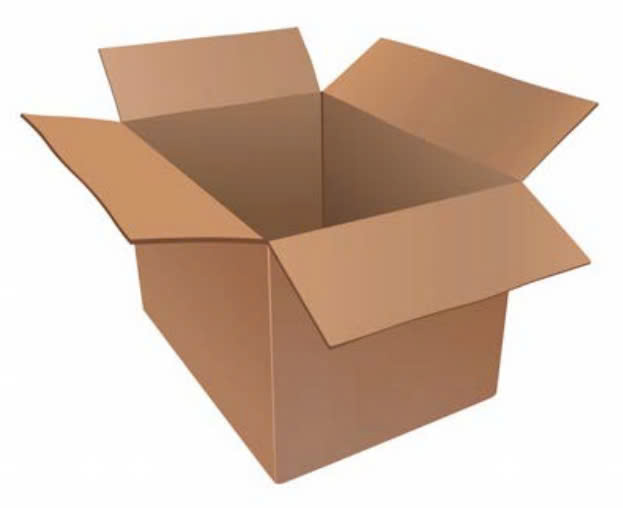

In [3]:
# Đọc hình ảnh
filename = '/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/download.jpg'
img = cv2.imread(filename)
# Hiển thị
cv2_imshow(img)

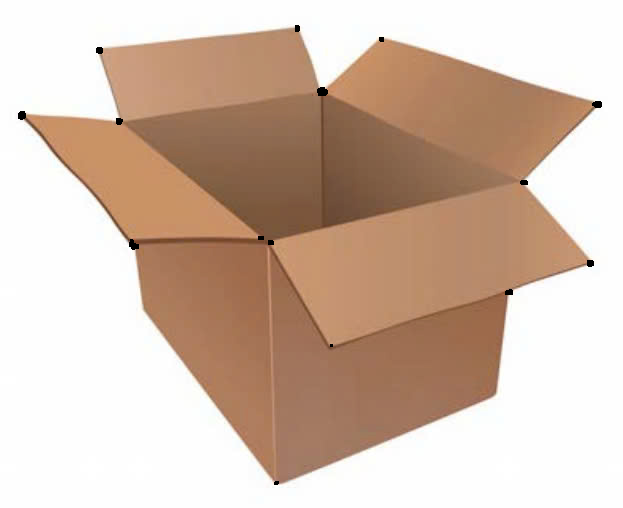

In [4]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv2.cornerHarris(gray, 4,5, 0.04) # to detect only sharp corners
#dst = cv2.cornerHarris(gray, 14, 5, 0.04) # to detect soft corners
# Result is dilated for marking the corners
dst = cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01*dst.max()] = [0,0,0]
# Hiển thị hình ảnh đã được thay đổi kích thước
cv2_imshow(img)
# cv2.waitKey()  # This line is not needed in Colab.

# **Good Features To Track**

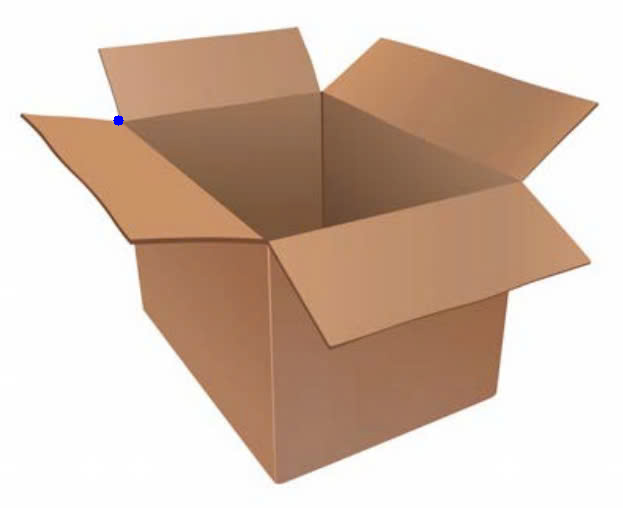

In [5]:
import numpy as np
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 7, 0.05, 25)
corners = np.int32(corners)

for item in corners:
  x, y = item[0]
cv2.circle(img, (x,y), 5, 255, -1)
cv2_imshow(img)


# **Scale Invariant Feature Transform (SIFT)**

In [1]:
!pip install opencv-contrib-python


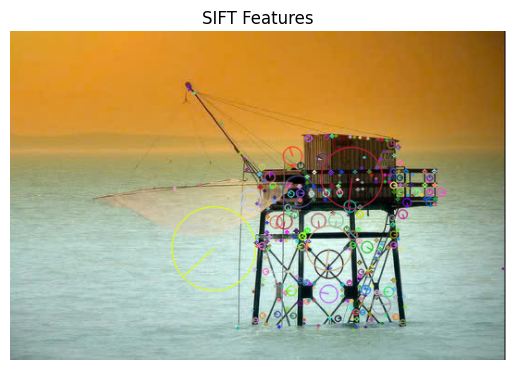

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
input_image = cv2.imread('/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/bien.jpg')

# Chuyển ảnh sang ảnh xám
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)

# Khởi tạo SIFT
sift = cv2.SIFT_create()

# Phát hiện các điểm đặc trưng
keypoints = sift.detect(gray_image, None)

# Vẽ các điểm đặc trưng lên ảnh
input_image_with_keypoints = cv2.drawKeypoints(input_image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Hiển thị ảnh với các điểm đặc trưng sử dụng matplotlib
plt.imshow(cv2.cvtColor(input_image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Features')
plt.axis('off')  # Tắt trục toạ độ
plt.show()


# **Speeded Up Robust Features (SURF)**

In [2]:
!pip install opencv-contrib-python --upgrade

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Đọc ảnh
img = cv2.imread('/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/bien.jpg')

# Chuyển ảnh sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Khởi tạo SURF
surf = cv2.xfeatures2d.SURF_create(15000)  # Thiết lập hessianThreshold

# Phát hiện các điểm đặc trưng và tính toán descriptor
kp, des = surf.detectAndCompute(gray, None)

# Vẽ các điểm đặc trưng lên ảnh
img_with_keypoints = cv2.drawKeypoints(img, kp, None, (0, 255, 0), 4)

# Hiển thị ảnh với các điểm đặc trưng sử dụng matplotlib
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SURF Features')
plt.axis('off')  # Tắt trục tọa độ
plt.show()


AttributeError: module 'cv2.xfeatures2d' has no attribute 'SURF_create'

# **Features from Accelerated Segment Test (FAST)**

In [ ]:
import cv2
import numpy as np
gray_image = cv2.imread('/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/CoLe.jpg', 0)
fast = cv2.FastFeatureDetector()
# Detect keypoints
keypoints = fast.detect(gray_image, None)
print("Number of keypoints with non max suppression:")
len(keypoints)
# Draw keypoints on top of the input image
img_keypoints_with_nonmax = cv2.drawKeypoints(gray_image,
keypoints, color=(0,255,0))
cv2.imshow('FAST keypoints - with non max suppression',img_keypoints_with_nonmax)
# Disable nonmaxSuppression
fast.setBool('nonmaxSuppression', False)
# Detect keypoints again
keypoints = fast.detect(gray_image, None)
print ("Total Keypoints without nonmaxSuppression:", len(keypoints))
# Draw keypoints on top of the input image
img_keypoints_without_nonmax = cv2.drawKeypoints(gray_image,
keypoints, color=(0,255,0))
cv2.imshow('FAST keypoints - without non max suppression',
img_keypoints_without_nonmax)
cv2.waitKey()

# **Binary Robust Independent Elementary Features (BRIEF)**

In [1]:
import cv2
import numpy as np
gray_image = cv2.imread('/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/nha.jpg', 0)
# Initiate FAST detector
fast = cv2.FastFeatureDetector()
# Initiate BRIEF extractor
brief = cv2.DescriptorExtractor_create("BRIEF")
# find the keypoints with STAR
keypoints = fast.detect(gray_image, None)
# compute the descriptors with BRIEF
keypoints, descriptors = brief.compute(gray_image, keypoints)
gray_keypoints = cv2.drawKeypoints(gray_image, keypoints,
color=(0,255,0))
cv2.imshow('BRIEF keypoints', gray_keypoints)
cv2.waitKey()

AttributeError: module 'cv2' has no attribute 'DescriptorExtractor_create'

# **Oriented FAST and Rotated BRIEF (ORB)**

In [ ]:
import cv2
import numpy as np
input_image = cv2.imread('/content/gdrive/MyDrive/Colab_Notebooks/Computer_Vision/Tuan02_21124661_NguyenKhaMinh/Lab/Week_2/bien.jpg')
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
# Initiate ORB object
orb = cv2.ORB()
# find the keypoints with ORB
keypoints = orb.detect(gray_image, None)
# compute the descriptors with ORB
keypoints, descriptors = orb.compute(gray_image, keypoints)
# draw only the location of the keypoints without size or orientation
final_keypoints = cv2.drawKeypoints(input_image, keypoints,
color=(0,255,0), flags=0)
cv2.imshow('ORB keypoints', final_keypoints)
cv2.waitKey()